In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
# import cartopy.crs as ccrs
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
network = pd.read_csv(r'J:/IC卡-北京/地铁交通流分配/数据集/subway_network.csv',encoding = 'gbk')
stop_location = pd.read_csv(r'J:/IC卡-北京/地铁交通流分配/数据集/stop_location.csv',encoding = 'gbk')
stop_num = pd.read_csv(r'J:/IC卡-北京/地铁交通流分配/数据集/stop_num.csv',encoding = 'gbk')

In [3]:
network_count = network #用于计算的表格，保留换乘边的行记录
network_display = network[network['Source'] != network['Target']] #用于可视化

In [4]:
# 创建新的列，拼接字符串,用.iloc[]不会有警告
# network_display.loc[:,'Source'] = network_display.apply(lambda row: str(row['Source']) + '-' + str(row['Source_num']), axis=1)
# network_display.loc[:,'Target'] = network_display.apply(lambda row: str(row['Target']) + '-' + str(row['Target_num']), axis=1)
network_display

,Source,Target,Source_line,Target_line,Source_id,Target_id,Source_num,Target_num,Travel_time,Source_lon,Source_lat,Target_lon,Target_lat
0,苹果园,古城,1,1,1_1,1_2,1,2,241,116.177611,39.926502,116.190337,39.907450
1,古城,八角游乐园,1,1,1_2,1_3,2,3,209,116.190337,39.907450,116.212684,39.907442
2,八角游乐园,八宝山,1,1,1_3,1_4,3,4,213,116.212684,39.907442,116.235948,39.907440
3,八宝山,玉泉路,1,1,1_4,1_5,4,5,161,116.235948,39.907440,116.252888,39.907433
4,玉泉路,五棵松,1,1,1_5,1_6,5,6,197,116.252888,39.907433,116.273987,39.907456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,永丰,永丰南,16,16,16_5,16_6,389,390,143,116.238481,40.071868,116.248154,40.065575
370,永丰南,西北旺,16,16,16_6,16_7,390,391,230,116.248154,40.065575,116.257923,40.048703
371,西北旺,马连洼,16,16,16_7,16_8,391,392,239,116.257923,40.048703,116.272520,40.032637
372,马连洼,农大南路,16,16,16_8,16_9,392,393,165,116.272520,40.032637,116.282012,40.021681


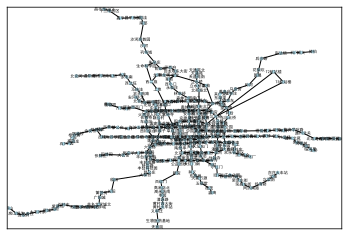

In [5]:
#可视化图
G = nx.Graph()
for index, row in network_display.iterrows():
    source_node = row['Source']
    target_node = row['Target']
    
    G.add_edge(source_node, target_node)
    
    source_pos = (row['Source_lon'], row['Source_lat'])
    target_pos = (row['Target_lon'], row['Target_lat'])
    
    G.nodes[source_node]['pos'] = source_pos
    G.nodes[target_node]['pos'] = target_pos
    
    pos = nx.get_node_attributes(G, 'pos')

fig, ax = plt.subplots(figsize=(6,4)) #画布大小

nx.draw_networkx(G, pos, node_size=7, node_color='lightblue', font_size=4, ax=ax)

#根据经纬度设置x轴和y轴的范围
x_vals = [pos[node][0] for node in G.nodes()]
y_vals = [pos[node][1] for node in G.nodes()]

ax.set_xlim([min(x_vals)-0.005, max(x_vals)+0.005])
ax.set_ylim([min(y_vals)-0.005, max(y_vals)+0.005])

%config InlineBackend.figure_format = 'svg'#生成矢量图

# plt.rcParams["figure.dpi"] = 600
# 导出为 PNG 文件
fig.savefig("C:/Users/Administrator/Desktop/my_plot_high_res.svg")
plt.show()

In [6]:
#计算网络中各个节点的度值、点度中心性、介数中心性
degree_dict = dict(G.degree())
degree_centrality_dict = nx.degree_centrality(G)
betweenness_centrality_dict = nx.betweenness_centrality(G)

df1 = pd.DataFrame({
    'degree': degree_dict,
    'degree_centrality': degree_centrality_dict,
    'betweenness_centrality': betweenness_centrality_dict
})
df1 = df1.reset_index().rename(columns={'index': 'stop'})  # 重置索引并将原来的索引列名改为 'node'

In [7]:
# df1 = pd.merge(df1,stop_num,on = 'stop',how = 'left')
# df1.drop_duplicates(subset=['stop'], keep='first', inplace=True)

In [8]:
df1_sorted = df1.sort_values('degree')
df1_sorted.reset_index(drop=True, inplace=True)

In [9]:
df1_sorted

,stop,degree,degree_centrality,betweenness_centrality
0,昌平西山口,1,0.003049,0.000000
1,潞城,1,0.003049,0.000000
2,香山,1,0.003049,0.000000
3,清华东路西口,1,0.003049,0.000000
4,亦庄火车站,1,0.003049,0.000000
...,...,...,...,...
324,望京,4,0.012195,0.106195
325,海淀黄庄,4,0.012195,0.121946
326,磁器口,4,0.012195,0.112409
327,三元桥,5,0.015244,0.079755


In [16]:
df1_sorted.to_csv('C:/Users/Administrator/Desktop/222.csv',encoding = 'gbk', index=False)

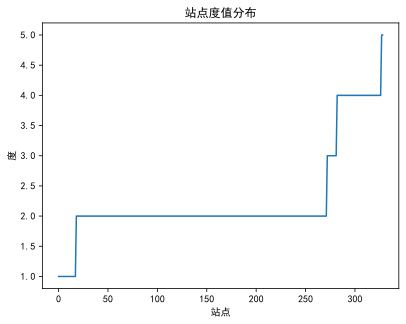

In [10]:
import matplotlib.pyplot as plt

plt.plot(df1_sorted.index, df1_sorted['degree'])
plt.xlabel('站点')
plt.ylabel('度')
plt.title('站点度值分布')
plt.show()

In [11]:
#计算一下拓扑网络中不同度值的站点的分布情况
degree_counts = df1['degree'].value_counts()
degree_proportions = degree_counts / len(df1)
degree_proportions_df = degree_proportions.reset_index()
degree_proportions_df.columns = ['degree', 'proportion']
degree_proportions_df

,degree,proportion
0,2,0.772036
1,4,0.136778
2,1,0.054711
3,3,0.030395
4,5,0.006079


<div class="girk">
结果表明：度值为2的节点在网络中的比例最大，达到了77%以上，节点度值为大于2的站点比例约为17%，也即北京地铁网络换乘站点在网络中的比例约为17%。</div><i class="fa fa-lightbulb-o "></i>

In [12]:
#计算网络G的节点总数、边的总数、平均度值、平均介数、网络直径、网络效率
# 节点总数
num_nodes = nx.number_of_nodes(G)
# 边的总数
num_edges = nx.number_of_edges(G)
# 平均度值
avg_degree = sum(dict(G.degree()).values()) / num_nodes
# 平均介数
avg_betweenness = sum(nx.betweenness_centrality(G).values()) / num_nodes
# 网络直径
diameter = nx.diameter(G)
# 网络效率
efficiency = nx.global_efficiency(G)
#网络聚类系数
clustering_coefficient = nx.average_clustering(G)
##########################################################
num_nodes,num_edges,avg_degree,avg_betweenness,diameter,efficiency,clustering_coefficient

(329,
 373,
 2.2674772036474162,
 0.047529553472384196,
 54,
 0.09173630358831293,
 0.008409321175278622)

<div class="girk">
结论：拓扑图中，共有329个站点(与science论文一致)；373条边；网络的平均度值位2.13；平均介数为0.04752955；网络直径为54；也就是网络中任意两点之间最多需要经过54个站点才能到达；网络效率为0.0917363，各站点间的平均距离（经过站点数）的倒数。</div><i class="fa fa-lightbulb-o "></i>

In [13]:
#  输出点度中心性数值最大的前10个站点
df1_degree_top10 = df1.nlargest(10, 'degree_centrality')
df1_degree_top10

,stop,degree,degree_centrality,betweenness_centrality
49,西直门,5,0.015244,0.249262
197,三元桥,5,0.015244,0.079755
7,公主坟,4,0.012195,0.137861
8,军事博物馆,4,0.012195,0.165063
11,复兴门,4,0.012195,0.099309
12,西单,4,0.012195,0.064252
16,东单,4,0.012195,0.085902
17,建国门,4,0.012195,0.124466
19,国贸,4,0.012195,0.065538
20,大望路,4,0.012195,0.140742


In [14]:
# 输出介数中心性数值最大的前10个站点
df1_betweenness_top10 = df1.nlargest(10, 'betweenness_centrality')
df1_betweenness_top10

,stop,degree,degree_centrality,betweenness_centrality
49,西直门,5,0.015244,0.249262
48,车公庄,4,0.012195,0.205952
121,白石桥南,4,0.012195,0.189855
190,知春路,4,0.012195,0.189194
40,朝阳门,4,0.012195,0.178896
184,六里桥,4,0.012195,0.171425
8,军事博物馆,4,0.012195,0.165063
183,七里庄,4,0.012195,0.163926
220,大钟寺,2,0.006098,0.151405
115,金台路,4,0.012195,0.149982


In [15]:
# df1.to_csv('C:/Users/Administrator/Desktop/df1.csv',encoding = 'gbk')